In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score
from sklearn.neighbors import KNeighborsClassifier

In [120]:
dataframe = pd.read_csv(r"../../datasets/glass.csv")

In [121]:
dataframe.drop('Index',axis=1,inplace=True)

In [122]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [123]:
#Imputing not necessary as data is clean
#from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean')
# dataframe[dataframe.columns] = imputer.fit_transform(dataframe[dataframe.columns])

In [124]:
dataframe.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [125]:
#pairplot
#sns.pairplot(dataframe,hue='Class')

In [126]:
dataframe['Class'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [127]:
y = dataframe['Class'].values
x = dataframe.drop('Class',axis=1)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [128]:
scaler = StandardScaler()
scaled_frame = scaler.fit_transform(x)
print(scaled_frame)


[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


[]

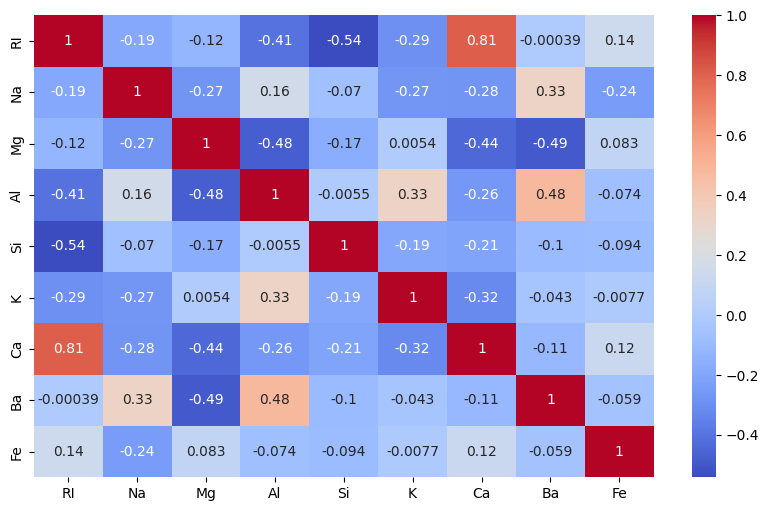

In [129]:
#heat map

correlation_matrix = x.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap = "coolwarm")
plt.plot()

In [130]:
# defining euclidean and manhattan distance

def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x2-x1)**2))
def manhattan_distance(x1,x2):
    return np.sum(np.abs(x1-x2))

In [131]:
dummy_1 = np.array([4,5])
dummy_2 = np.array([1,2])

print(euclidean_distance(dummy_1,dummy_2))

print(manhattan_distance(dummy_1,dummy_2))

4.242640687119285
6


In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=70,test_size=30,random_state=19)

In [133]:
k=3
euclidean_classifier = KNeighborsClassifier(n_neighbors=k,metric=euclidean_distance)
manhattan_classifier = KNeighborsClassifier(n_neighbors=k,metric=manhattan_distance)
euclidean_classifier.fit(x_train,y_train)
manhattan_classifier.fit(x_train,y_train)

KNeighborsClassifier(metric=<function manhattan_distance at 0x000002385D186340>,
                     n_neighbors=3)

In [134]:
y_predictions_euclidean = euclidean_classifier.predict(x_test)
y_predictions_manhattan = manhattan_classifier.predict(x_test)

In [135]:
accuracy_euclidean = accuracy_score(y_predictions_euclidean,y_test)
print(f" accuracy using euclidean distance {accuracy_euclidean:.3f}")
accuracy_manhattan = accuracy_score(y_predictions_manhattan,y_test)
print(f"accuracy using manhattan distance {accuracy_manhattan:.3f}")


 accuracy using euclidean distance 0.667
accuracy using manhattan distance 0.600


In [140]:
cross_validation_score_euclidean = cross_val_score(euclidean_classifier,x,y,cv=7)
print(f" Euclidean cross validation score is {cross_validation_score_euclidean}")
cross_validation_score_manhattan = cross_val_score(manhattan_classifier,x,y,cv=7)
print(f" manhattan cross validation score is {cross_validation_score_manhattan}")

 Euclidean cross validation score is [0.51612903 0.64516129 0.58064516 0.48387097 0.8        0.56666667
 0.66666667]
 manhattan cross validation score is [0.48387097 0.74193548 0.61290323 0.58064516 0.76666667 0.6
 0.63333333]


[]

<Figure size 1000x600 with 0 Axes>

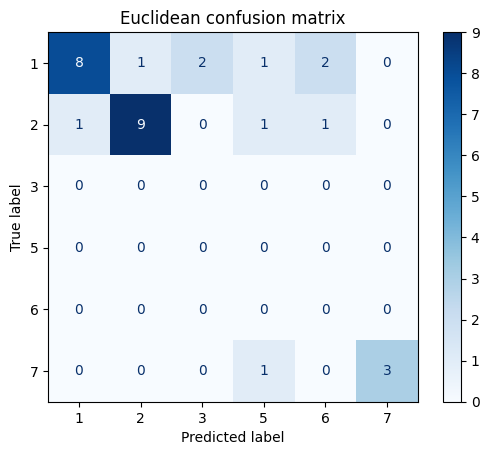

<Figure size 1000x600 with 0 Axes>

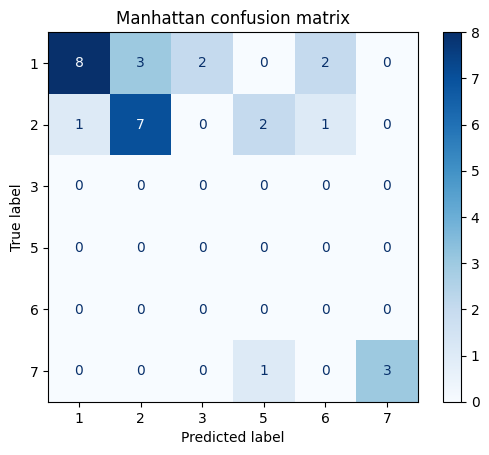

In [143]:
#confusion matrix
matrix_euclidean = confusion_matrix(y_predictions_euclidean,y_test)
matrix_manhattan = confusion_matrix(y_predictions_manhattan,y_test)

plt.figure(figsize=(10,6))
display_1 = ConfusionMatrixDisplay(matrix_euclidean,display_labels=[1,2,3,5,6,7])
display_1.plot(cmap = plt.cm.Blues)
plt.title('Euclidean confusion matrix')
plt.plot()
plt.figure(figsize=(10,6))
display_2 = ConfusionMatrixDisplay(matrix_manhattan,display_labels=[1,2,3,5,6,7])
display_2.plot(cmap = plt.cm.Blues)
plt.title('Manhattan confusion matrix')
plt.plot()